# Notebook 1

## 1D correlation and convolution 

In this notebook, we are going to revisit the concepts of correlation and convolution and we will be looking at  the definitions and Python code that plots examples on some test inputs. This notebook intends to impart both an intuitive and mathematical understanding of topics with applications and examples. 

Correlation and convolution are quite pertinent to image processing and are similar with slight modifications. However, correlation is somewhat easier to relate to, because we have seen this in statistics and data analysis. We will start with defining convolution, correlation and understand its different types, mathematical notations and finally, some examples. 

The goal of this notebook is to appreciate the role that correlation and convolution have in image processing. Though simple, they are quite important. Both of them share similarity on the basis that they both are *shift-invariant* and *linear*. Shift-invariant means that we perform the same operation at every point in the image and being linear, we replace every pixel with a linear combination of the neighbouring pixels. 

When thinking of 1D v/s 2D, 2D is actually real world and 1D can be thought of as a single row of pixels in an image. It is easier to understand the concepts in 1D and they can be used in 2D with slight modifications. 

### Developing an intuitive understanding of 1D correlation and convolution 

Convolution is a mathematical method of combining two functions to get a third function. It is used in signal processing to combine two signals to get a third. Correlation is a mathematical operation that is used to compare to functions or simply two signals. 

Both of the them are related to each other. Correlation is actually the convolution of a function with the inverse of second function. The function obtained therafter is known as the cross-correlation of the two functions. The magnitude of the cross-correlation is a measure of similarity between two functions. In a way, correlation is a special case of convolution. 

In computer vision, convolution has a special place as it is used to combine with a 1D or 2D image to produce a desired output. For example, blurring edges or sharpening edges using a combination of functions. 

### 1D Correlation: Working with an example

Starting with 1d correlation, let's say we have a first function I, a vector and second function, also a vector H and let's call it kernel. H has length 2h+1 which are indexed from -h to h, so that center element of H is H(0). For each position in the vector I at u, the resulting output is J(u), after performing correlation between I and H.

Mathematically, it can be represented as:

$$J(r)  = \sum_{u=-h}^{u=h} I(r+u) H (u) $$

Let's simplify this definition with an example. Let's say we have I and H as:

$$I = \begin{bmatrix}3 & 1 & 2 & 0 & 8 & 4 & 0 & 1 \end{bmatrix}$$

$$H = \begin{bmatrix} 1 & 2 & 1 \end{bmatrix}$$

Here, I is of length 8 and H has 3 elements, which means h=1 and. 

Let's say we want to calculate the third element of J, so:

$$J(3)  = \sum_{u=-1}^{u=1} I(3+u) H (u) $$

We will place H's center at the third element of I and multiply corresponding values of H and I and add them up to get J(3)

J(3)=1 * 1 + 2 * 2 + 0 * 1

J(3)= 5

We can calculate other values of J similarly. 

Before, we implement in Python, we have to think of what we do at boundary. For example, while calculating J(1), we have nothing for J(0). There are different methods for dealing with boundaries, but we will be padding the original vector, I with 0's. 

In [1]:
#creating a general function to perform correlation

import numpy as np
import matplotlib.pyplot as plt

def correlation_1d(image, kernel):
    
    """
    Cross-correlation of two 1-dimensional vectors.
    
    Parameters
    ----------
    image,kernel : array_like
        Input sequences.
    
    Returns
    -------
    J : ndarray
        "Same" mode cross-correlation of image and kernel.
    
    Examples
    --------
    >>> correlation_1d([1, 2, 3], [0, 1, 0.5])
    array([2. ,  3.5,  3. ])
    >>> np.correlate([1, 2, 3], [0, 1, 0.5])
    array([2, 3, 3])
    
    """
    
    #defining k as the kernel is assumed to be of length 2k+1
    k=(len(kernel)-1)//2
    
    #defining shift for taking an inner product of image and kernel
    shift=0
    
    #initializing an empty array to store the final output
    J=[]
    
    for i in range(0+shift,(len(image)-shift)):
        
        #storing the sum in result
        result=0
        
        #iterating over kernel with count
        count=0
        
        for j in range(i-k,i+k+1):
            
            if j<len(image):
                
                if (j<0):
                    result=0

                elif(j>=0):
                    result+=image[j]*kernel[count]

                count+=1
        
        #appending the sum
        J.append(result)
    
    return np.asarray(J,dtype=int)

In [2]:
#an example of a 1D image I and a kernel H

I=[3,1,2,0,8,4,0]
H=[1,2,1]

print(correlation_1d(I,H))

[ 7  7  5 10 20 16  4]


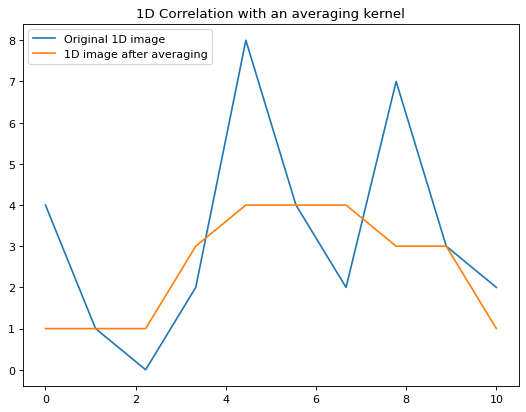

In [3]:
#implementation of an example of averaging
#We will see more of this in detail in notebook 2

from matplotlib.pyplot import figure
from numpy import random
figure(figsize=(8, 6), dpi=80)

I=random.randint(0, 10, 10, dtype=int)
H=[1/3,1/3,1/3]

J=correlation_1d(I,H)

x = np.linspace(0,10,10)
plt.plot(x,I,label="Original 1D image")
plt.plot(x,J, label='1D image after averaging')
plt.legend(loc="upper left")
plt.title("1D Correlation with an averaging kernel")
plt.show()

### Template matching with correlation

Correlation has an important utility that it let's us recognise our elements of choice in a picture. Let's say you want to spot the number of birds in a picture or video, so you can take one template of a bird and try to match it with the entire picture to spot the parts of image where correlation of this template is really high. 

The points where correlation is high can be the parts of image where we can spot birds. Since we are working in 1D, let's try and understand how it can be applied in principle. 

We have a template T that we slide around the image I to look for locations where T overlaps the image so that values in the teamplate are aligned with similar values in the image. As we move the template around the image, we can think of taking a window W on the image, of the same size as template T. 

Now the question arises, how do we measure the similarity? One way to do that is to find inner product of normalized vector version of T and W. The product of these two unit products will yield a scalar between -1 and 1:

$$-1\leq\rho\leq1$$

The value of $\rho$ indicates the level of similarity between the window and template.

In [4]:
#Python code to show template matching 

I=np.array([3,3,4,3,2,7,3,2,3,6])

#mean normalized image vector
i=(I-I.mean())/np.linalg.norm(I-I.mean())

H=np.array([1,3,2])

#mean normalized kernel vector
h = H-H.mean() / np.linalg.norm(H-H.mean())

#1D correlation between mean normalized image and kernel vector 

j=np.correlate(i,h)

p=j/np.linalg.norm(j)

np.around(p,2)

array([-0.06,  0.07, -0.27, -0.04,  0.76, -0.44, -0.35,  0.15])

### 1D Convolution: Working with an example

As discussed previously, correlation is a special case of convolution. Mathematically, we flip the kernel over before correlating. This changes the expression of convolution:

$$J(r)  = \sum_{u=-h}^{u=h} I(r-u) H (u) $$

We can also write the above as:

$$J(r)  = \sum_{u=-h}^{u=h} I(r+u) H (-u) $$

We called H, template in case of correlation, while in case of convolution, we will name it as "kernel". 

Convolution with kernel H(u) is same as performing correlation with H(-u)

Two important properties of convolution make it more preferred over correlation:

</br>

<li> Convolution is commutative while Correlation is not </li>
<li> Convolution in 1D corresponds to multiplying two polynomials </li>

### Dealing with boundaries

As with correlation, convolution becomes undefined at pixel boundaries and we have a couple of ways to fix that. 

**Full Convolution**: Extend the image I with zeros where they are not defined, and then only output the nonzero part of the result. Full convolution yields an output image J that is larger than the input image. 


**Valid Convolution**: The output image J is defined to be smaller than I and the pixels values closer to the image boundaries are not computed.


**Same Convolution**: The input image is padded with zero-values pixels so that the kernel fits the padded image everywhere withut being undefined at boundaries. 

In [5]:
def convolution_1d (image,kernel,mode):
    
    """
    
    Returns the discrete, linear convolution of two one-dimensional sequences.
    
    Parameters
    ----------
    image: (m,) array_like
        First one-dimensional input array.
    kernel : (k,) array_like
        Second one-dimensional input array.
        
    mode : {'full', 'valid', 'same'}
    
        'full':
          This returns the convolution
          at each point of overlap, with an output shape of (m+k-1,). At
          the end-points of the convolution, the signals do not overlap
          completely, and boundary effects may be seen.
          
        'same':
          Mode 'same' returns output of length (m,).  Boundary
          effects are still visible.
          
        'valid':
          Mode 'valid' returns output of length
          (m-k+1).  The convolution product is only given
          for points where the signals overlap completely.  Values outside
          the signal boundary have no effect.
          
    Returns
    -------
    J : ndarray
        Discrete, linear convolution of image and kernel
    
    Examples
    --------
    >>> convolve_1d([1, 2, 3], [0, 1, 0.5],"full")
    array[0, 1, 2.5, 4.0, 1.5]
    >>> convolve_1d([1,2,3],[0,1,0.5], 'same')
    array([1.0 , 2.5,  4.0])
    >>> convolve_1d([1,2,3],[0,1,0.5], 'valid')
    array([2.5])
    
    """
    #flipping the kernel, as per the definition
    kernel=kernel[::-1]
    
    #defining k as the kernel is assumed to be of length 2k+1
    k=(len(kernel)-1)//2
    
    if mode=="same":
         #defining shift for taking an inner product of image and kernel
        shift=0
    if mode=="full":
        shift=-k
    if mode=="valid":
        shift=k
    
    #initializing an empty array to store the final output
    J=[]
    
    for i in range(0+shift,(len(image)-shift)):
        #storing the sum in result
        result=0
        
        #iterating over kernel with count
        count=0
        for j in range(i-k,i+k+1):
            
            if j<len(image):
                
                if (j<0):
                    result=0

                elif(j>=0):
                    result+=image[j]*kernel[count]

                count+=1
                
        J.append(result)
    return np.asarray(J,dtype=int)

In [6]:
#an example of a 1D image with vector I and a kernel H

I=[3,1,2,0,8,4,0]
H=[1,2,3]

print(convolution_1d(I,H,"same"))

[ 7 13  7 14 20 32 12]


There will be more examples for convolution in next notebooks!

### References
  
1. Duke CS 527 Spring 2022 Lecture Notes 1:
   https://courses.cs.duke.edu//spring22/compsci527/notes/n_01_convolution.pdf

2. University of Maryland CMSC 426: https://www.cs.umd.edu/~djacobs/CMSC426/Convolution.pdf

3. Cornell University CS1114 2013: https://www.cs.cornell.edu/courses/cs1114/2013sp/sections/S06_convolution.pdf